In [1]:
import numpy as np
import pandas as pd

## Example 1

In [3]:
monthly_temp_celsius=[28,29,31,35,40,36,33,31,28,30,24,23,29,28,32,36,42,38,32,29,28,31,26,25,27]

In [4]:
df=pd.DataFrame({'T':monthly_temp_celsius})

In [5]:
df['M']=df['T'].diff(1)

In [6]:
df['Q']=df['T'].diff(3)
print(df)

     T    M     Q
0   28  NaN   NaN
1   29  1.0   NaN
2   31  2.0   NaN
3   35  4.0   7.0
4   40  5.0  11.0
5   36 -4.0   5.0
6   33 -3.0  -2.0
7   31 -2.0  -9.0
8   28 -3.0  -8.0
9   30  2.0  -3.0
10  24 -6.0  -7.0
11  23 -1.0  -5.0
12  29  6.0  -1.0
13  28 -1.0   4.0
14  32  4.0   9.0
15  36  4.0   7.0
16  42  6.0  14.0
17  38 -4.0   6.0
18  32 -6.0  -4.0
19  29 -3.0 -13.0
20  28 -1.0 -10.0
21  31  3.0  -1.0
22  26 -5.0  -3.0
23  25 -1.0  -3.0
24  27  2.0  -4.0


In [7]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [8]:
# Create a pandas Series with your sales data
sales_data = pd.Series([100, 110, 105, 115, 120, 130, 135, 140, 150, 145, 160, 170, 165, 175, 180, 185, 190, 200, 195, 210, 220, 215, 225, 230])
# Calculate ACF and PACF
acf = sm.tsa.acf(sales_data, nlags=5)
pacf = sm.tsa.pacf(sales_data, nlags=5)

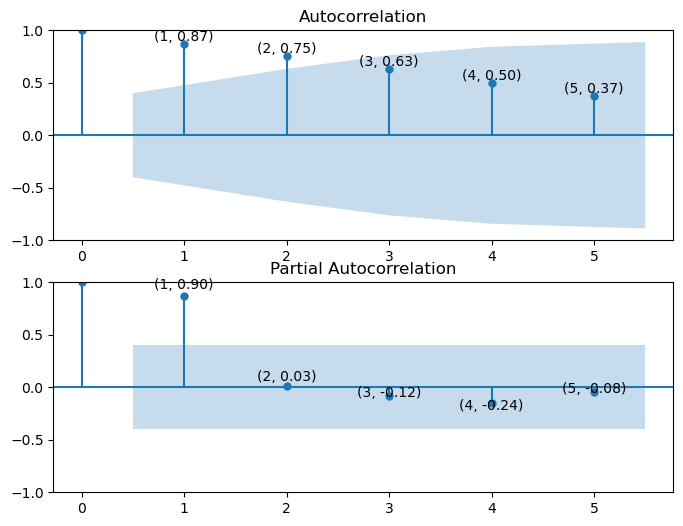

In [9]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
# Plot ACF with coordinates
plot_acf(sales_data, lags=5, ax=ax1)
for lag, value in enumerate(acf[1:6], start=1):
    ax1.text(lag, value, f'({lag}, {value:.2f})', ha='center', va='bottom')
# Plot PACF with coordinates
plot_pacf(sales_data, lags=5, ax=ax2)
for lag, value in enumerate(pacf[1:6], start=1):
    ax2.text(lag, value, f'({lag}, {value:.2f})', ha='center', va='bottom')
plt.show()


## Example 2

In [10]:
# Create a pandas Series with your sales data
sales_data = pd.Series([100, 110, 105, 115, 120, 130, 135, 140, 150, 145, 160, 170, 165, 175, 180, 185, 190, 200, 195, 210, 220, 215, 225, 230])
# Fit an ARIMA model
arima_model = sm.tsa.ARIMA(sales_data, order=(1, 1, 1)) # Example order (p, d, q)
arima_result = arima_model.fit()

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
# Print ARIMA model summary
print("ARIMA Model Summary:")
print(arima_result.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -76.944
Date:                Wed, 25 Oct 2023   AIC                            159.889
Time:                        09:34:22   BIC                            163.295
Sample:                             0   HQIC                           160.745
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    881.936      0.000       0.998       1.002
ma.L1         -0.9982      0.447     -2.231      0.026      -1.875      -0.121
sigma2        41.6990      0.01

In [12]:
# Make ARIMA forecasts
arima_forecast = arima_result.forecast(steps=5).values # Example: Forecast the next 5 values
print("ARIMA Forecast:", arima_forecast)

ARIMA Forecast: [235.3301095  240.66020677 245.99029179 251.32036456 256.6504251 ]


In [13]:
# Fit a SARIMA model
sarima_model = sm.tsa.SARIMAX(sales_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) # Example orders (p, d, q) and seasonal orders (P, D, Q, m)
sarima_result = sarima_model.fit()

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41075D+00    |proj g|=  3.45733D-02

At iterate    5    f=  1.38746D+00    |proj g|=  5.63137D-03

At iterate   10    f=  1.38447D+00    |proj g|=  7.73836D-03

At iterate   15    f=  1.38392D+00    |proj g|=  3.44068D-03

At iterate   20    f=  1.38375D+00    |proj g|=  2.88049D-03

At iterate   25    f=  1.38362D+00    |proj g|=  2.57576D-03

At iterate   30    f=  1.38354D+00    |proj g|=  4.20477D-03

At iterate   35    f=  1.38350D+00    |proj g|=  2.58677D-03

At iterate   40    f=  1.38345D+00    |proj g|=  1.01571D-03

At iterate   45    f=  1.38343D+00    |proj g|=  1.36552D-03

At iterate   50    f=  1.38341D+00    |proj g|=  3.15208D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Print SARIMA model summary
print("\nSARIMA Model Summary:")
print(sarima_result.summary())


SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -33.202
Date:                            Wed, 25 Oct 2023   AIC                             76.404
Time:                                    09:38:45   BIC                             78.393
Sample:                                         0   HQIC                            75.150
                                             - 24                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2285      1.232      0.185      0.853      -2.187       2.644
ma.L1       

In [15]:
# Make SARIMA forecasts
sarima_forecast = sarima_result.forecast(steps=5).values # Example: Forecast the next 5 values
print("SARIMA Forecast:", sarima_forecast)

SARIMA Forecast: [229.98280278 240.00875532 254.91336867 254.96538164 259.96569255]


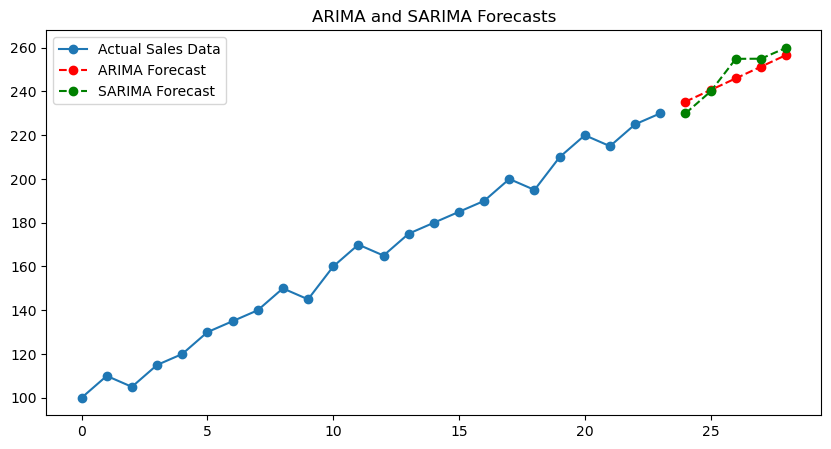

In [16]:
# Plot both ARIMA and SARIMA forecasts in one plot
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Actual Sales Data', marker='o')
plt.plot(range(len(sales_data), len(sales_data) + len(arima_forecast)), arima_forecast, label='ARIMA Forecast', linestyle='--', marker='o', color='red')
plt.plot(range(len(sales_data), len(sales_data) + len(sarima_forecast)), sarima_forecast, label='SARIMA Forecast', linestyle='--', marker='o', color='green')
plt.title('ARIMA and SARIMA Forecasts')
plt.legend()
plt.show()


## Example3

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("monthly-cola-production-in-austr.csv")
df.sample(10)

,Month,Monthly cola production
325,1983-02,148.1
45,1959-10,97.7
12,1957-01,95.9
315,1982-04,158.4
138,1967-07,95.0
398,1989-03,169.6
14,1957-03,83.3
96,1964-01,106.1
387,1988-04,151.9
359,1985-12,190.0


In [20]:
df['Month']=pd.to_datetime(df['Month'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly cola production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB
None


In [21]:
df.set_index('Month',inplace=True)

In [22]:
df['firstdiff']=df['Monthly cola production'].diff()
df['diff12']=df['Monthly cola production'].diff(12) #LAter used in SArimax

In [23]:
print(df.head())

            Monthly cola production  firstdiff  diff12
Month                                                 
1956-01-01                     93.2        NaN     NaN
1956-02-01                     96.0        2.8     NaN
1956-03-01                     95.2       -0.8     NaN
1956-04-01                     77.1      -18.1     NaN
1956-05-01                     70.9       -6.2     NaN


In [24]:
# NOw ARIMA
# In google Colab, you may need !pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

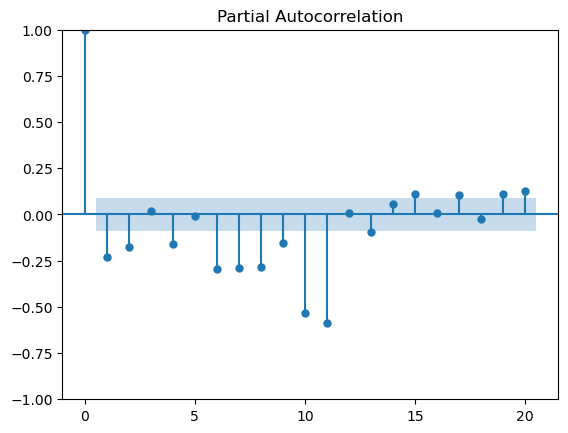

In [25]:
plot_pacf(df['firstdiff'].dropna(),lags=20)
plt.show()

In [26]:
# Shaded area is insignificant area 
# PACF gives us the auto regressive values (i.e. p - Refer to the slides)
# First p is 1 (the x-axis coordinate), whose value is ~0.25(the y-axis coordinate)
# So, significantly p values are 1,2,4,6,etc

# Now let us take this value as p and find q, for which we need ACF

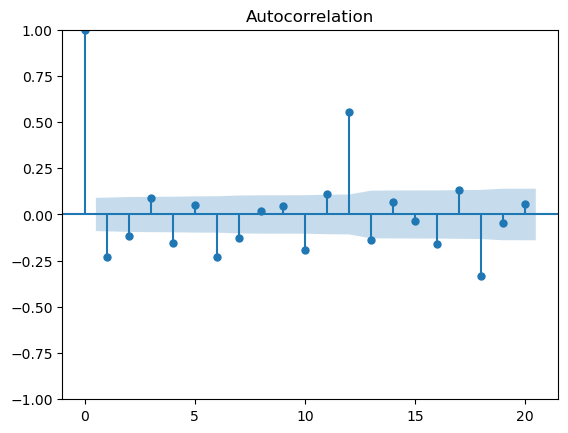

In [28]:
plot_acf(df['firstdiff'].dropna(),lags=20)
plt.show()

In [29]:
# Results of ACF are similar to that of PACF
# Interpretation: We got q, Significant q values are 1,2,4,6 etc

In [30]:
# Let us take p=1,q=1 (both are significant) and d=1 (already known)

In [31]:
# Build ARIMA model
train=df[:round(len(df)*0.7)] # Take the first 70% data
print(train.tail()) # Just to check where it ends

            Monthly cola production  firstdiff  diff12
Month                                                 
1983-05-01                    137.3        4.8    22.7
1983-06-01                    135.5       -1.8   -24.1
1983-07-01                    121.7      -13.8   -38.0
1983-08-01                    166.1       44.4     6.7
1983-09-01                    146.8      -19.3   -13.9


In [32]:
test=df[round(len(df)*0.7):] # Take the last 30% data, starting from 71%
print(test.head()) # Just to check where it starts

            Monthly cola production  firstdiff  diff12
Month                                                 
1983-10-01                    162.8       16.0    -2.7
1983-11-01                    186.8       24.0   -18.2
1983-12-01                    185.5       -1.3   -19.7
1984-01-01                    151.5      -34.0     9.9
1984-02-01                    158.1        6.6    10.0


In [33]:
model=ARIMA(train['Monthly cola production'],order=(1,1,1)) # Parameters (p,d,q)
model_fit=model.fit()

In [35]:
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])
df['arimaPred']=prediction
print(df.tail())

            Monthly cola production  firstdiff  diff12  arimaPred
Month                                                            
1995-04-01                    127.0      -25.0     1.0  157.58907
1995-05-01                    151.0       24.0    20.0  157.58907
1995-06-01                    130.0      -21.0     5.0  157.58907
1995-07-01                    119.0      -11.0    -8.0  157.58907
1995-08-01                    153.0       34.0    10.0  157.58907


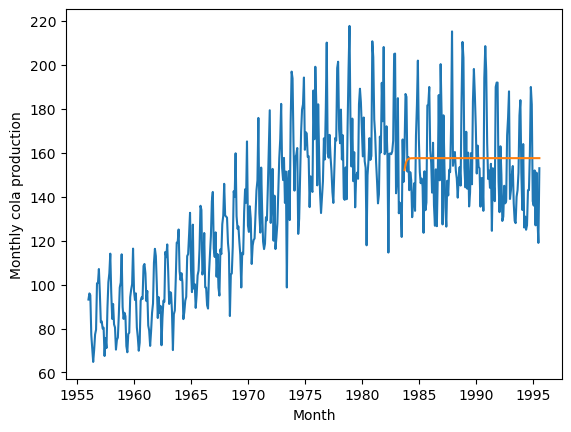

In [36]:
# Plot
sns.lineplot(data=df,x=df.index,y='Monthly cola production')
sns.lineplot(data=df,x=df.index,y='arimaPred')
plt.show()